<a href="https://colab.research.google.com/github/Icrz11/CS106.K21.RandomTeam/blob/master/DoAnAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import os 
from random import shuffle 
from skimage.feature import hog
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [0]:
TRAIN_DIR = '/content/gdrive/My Drive/Colab Notebooks/DoAnAIData/train'
TEST_DIR = '/content/gdrive/My Drive/Colab Notebooks/DoAnAIData/test'
IMG_SIZE = 50
Label = []

In [0]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1]
    elif word_label == 'dog': return [0]

In [0]:
def create_train_data():
  trainning_data = []
  labelss = []
  for img in tqdm(os.listdir (TRAIN_DIR)):
      label = label_img(img)
      path = os.path.join(TRAIN_DIR,img)
      img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
      trainning_data.append([np.array(img),np.array(label)])
  np.save('/content/gdrive/My Drive/Colab Notebooks/DoAnAIData/train_data.npy', trainning_data)
  return trainning_data
train_data = create_train_data()

100%|██████████| 25000/25000 [3:05:12<00:00,  2.25it/s]


In [0]:
Data = np.load('/content/gdrive/My Drive/Colab Notebooks/DoAnAIData/train_data.npy', allow_pickle=True)

[array([[129, 129, 127, ..., 168, 168, 168],
       [127, 127, 127, ..., 166, 163, 165],
       [127, 127, 127, ..., 167, 166, 164],
       ...,
       [ 20,  23,  32, ...,  46,  36,  35],
       [ 39,  40,  31, ...,  32,  32,  31],
       [ 50,  47,  54, ...,  34,  32,  30]], dtype=uint8)
 array([1])]


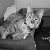

In [0]:
print (Data[1])
cv2_imshow(Data[1][0])

In [0]:
plt.hist (labels)
plt.title ('Categories')
plt.xlabel ('type')
plt.ylabel ('amount')

NameError: ignored

0 là chó, 1 là mèo


In [0]:
X = []
for i in range (len(Data)):
  X.append(Data[i][0])
Y = []
for i in range (len(Data)):
  Y.append(Data[i][1])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split (X,Y, test_size = 0.2, random_state = 30)


In [0]:
trainning_features = []
for i in range (len(X_train)):
  features = hog(X_train[i])
  trainning_features.append (features)

In [0]:
testing_features = []
for i in range (len(X_test)):
  features = hog(X_test[i])
  testing_features.append(features)

In [0]:
from sklearn import svm
model = svm.SVC()
model.fit(trainning_features, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pre = model.predict(testing_features)

In [0]:
acc = accuracy_score(pre, y_test)
print (acc)

0.7824


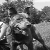

[[0.11292953 0.05116496 0.06777196 ... 0.20771538 0.13051351 0.17485465]]


In [0]:
a = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/DoAnAIData/test/1007.jpg', cv2.IMREAD_GRAYSCALE)
a = cv2.resize(a, (IMG_SIZE,IMG_SIZE))
cv2_imshow(a)
f = hog (a)
f = np.reshape (f, (1,-1))
print (f)


In [0]:
model.predict(f)

array([0])